# Dogecoin EDA and Prediction


## Overview
This project involves the exploratory data analysis (EDA) and prediction of Dogecoin prices using historical data. The primary objective is to analyze Dogecoin's price movements, trading volume, and other relevant metrics to gain insights into its market behavior. Additionally, the project aims to build predictive models to forecast future prices of Dogecoin. The analysis includes plotting historical prices, trading volume, and calculating moving averages. The project also involves training machine learning models for price prediction.

### Dataset

The dataset used in this project consists of historical price data for Dogecoin, a popular cryptocurrency. The data includes the following columns:

- **Date**: The date of the recorded prices.
- **Open**: The opening price of Dogecoin on that date.
- **High**: The highest price reached by Dogecoin on that date.
- **Low**: The lowest price reached by Dogecoin on that date.
- **Close**: The closing price of Dogecoin on that date.
- **Adj Close**: The adjusted closing price, which accounts for any corporate actions.
- **Volume**: The total trading volume of Dogecoin on that date.

### Data Source

The dataset was sourced from Yahoo Finance, a well-known provider of financial news, data, and commentary. To obtain the dataset, follow these steps:

1. Visit Yahoo Finance.
2. Search for “Dogecoin”.
3. Click on the “Historical Data” tab.
4. Adjust the date range as needed.
5. Click on the “Download” button to save the dataset as a CSV file.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Set visualization styles
sns.set()
plt.style.use('seaborn-whitegrid')

# Load the dataset from a CSV file
df = pd.read_csv("dogecoindataset.csv")

# Display the first few rows of the dataset
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-26,0.066754,0.066785,0.063879,0.064749,0.064749,266917426
1,2023-06-27,0.064747,0.065743,0.064553,0.065545,0.065545,212409649
2,2023-06-28,0.065550,0.065565,0.061584,0.062602,0.062602,274764095
3,2023-06-29,0.062594,0.064028,0.062551,0.063407,0.063407,192396033
4,2023-06-30,0.063402,0.066712,0.062643,0.066479,0.066479,489091093


### Data wrangling

In [2]:
# Drop any rows with missing values
df = df.dropna()

# Ensure the 'Date' column is in datetime format
df["Date"] = pd.to_datetime(df["Date"])


# Display the first few rows of the cleaned dataset
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-26,0.066754,0.066785,0.063879,0.064749,0.064749,266917426
1,2023-06-27,0.064747,0.065743,0.064553,0.065545,0.065545,212409649
2,2023-06-28,0.065550,0.065565,0.061584,0.062602,0.062602,274764095
3,2023-06-29,0.062594,0.064028,0.062551,0.063407,0.063407,192396033
4,2023-06-30,0.063402,0.066712,0.062643,0.066479,0.066479,489091093


## EDA

Eplore the dataset to gain insights into the Dogecoin dataset, by creating various visualizations that highlight different aspects of the data.

### **Line Plot of Closing Prices Over Time**:
    This will help us understand the trend of Dogecoin prices over time.

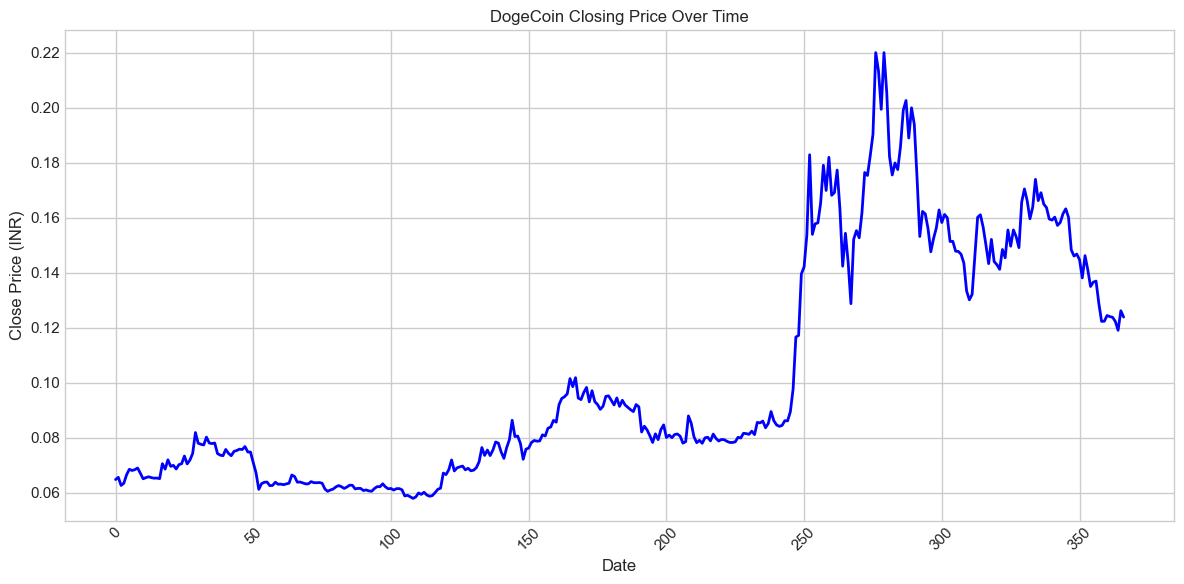

Shows the trend of Dogecoin`s closing price, providing insights into overall market movement.


In [3]:
# Line Plot of Closing Prices Over Time
plt.figure(figsize=(12, 6))
plt.title("DogeCoin Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (INR)")
plt.plot(df.index, df["Close"], color='blue', linewidth=2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f'Shows the trend of Dogecoin`s closing price, providing insights into overall market movement.')

### **Volume of Trades Over Time**:
    This will show how the trading volume has changed over time, which can indicate periods of high interest or activity.

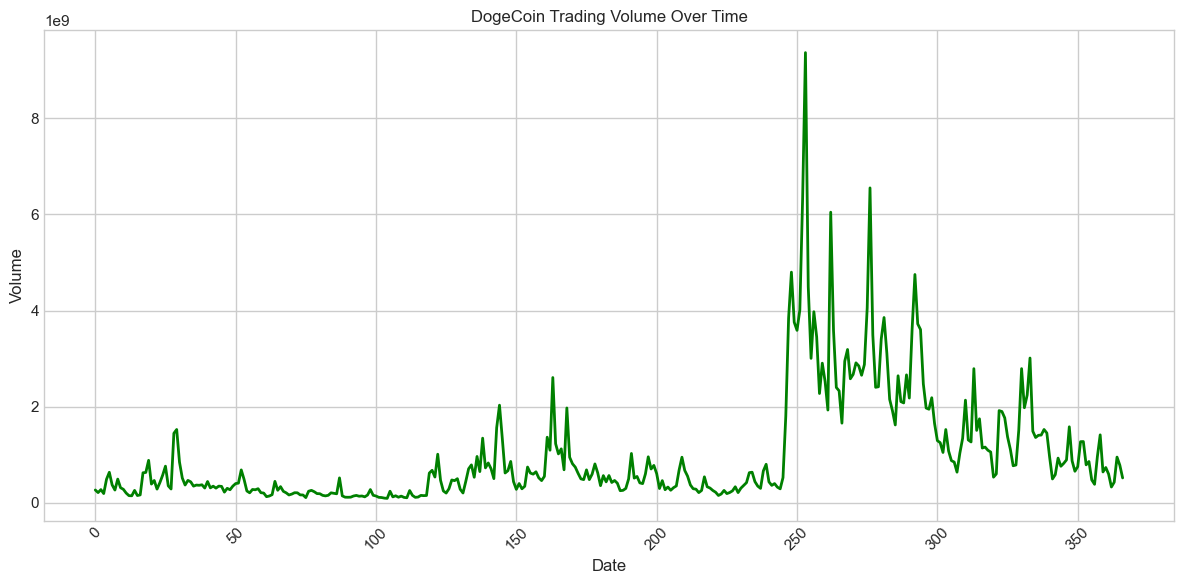

Highlights periods of high trading activity, which can be correlated with significant price movements or news events.


In [4]:
# Volume of Trades Over Time
plt.figure(figsize=(12, 6))
plt.title("DogeCoin Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.plot(df.index, df["Volume"], color='green', linewidth=2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f'Highlights periods of high trading activity, which can be correlated with significant price movements or news events.')

### **High and Low Prices Over Time**:
    This will show the daily price range and help identify periods of high volatility.

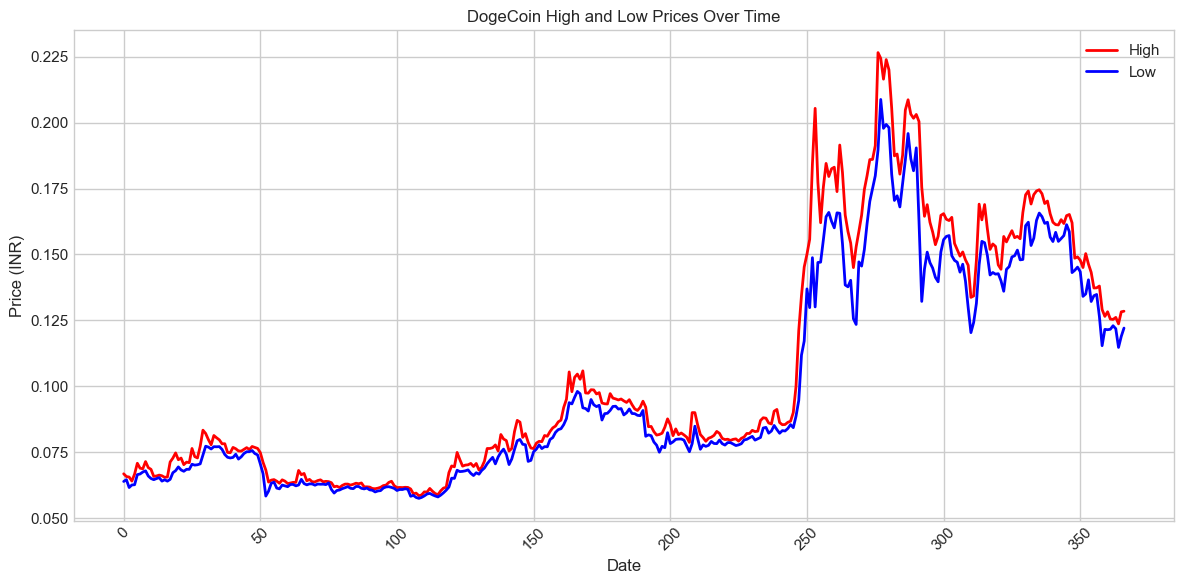

Displays the daily range of prices, helping to identify days with high volatility.


In [5]:
# High and Low Prices Over Time
plt.figure(figsize=(12, 6))
plt.title("DogeCoin High and Low Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.plot(df.index, df["High"], color='red', linewidth=2, label='High')
plt.plot(df.index, df["Low"], color='blue', linewidth=2, label='Low')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f'Displays the daily range of prices, helping to identify days with high volatility.')

### **Daily Percentage Change**:
    This will help us understand the daily fluctuations in price, indicating the level of volatility.

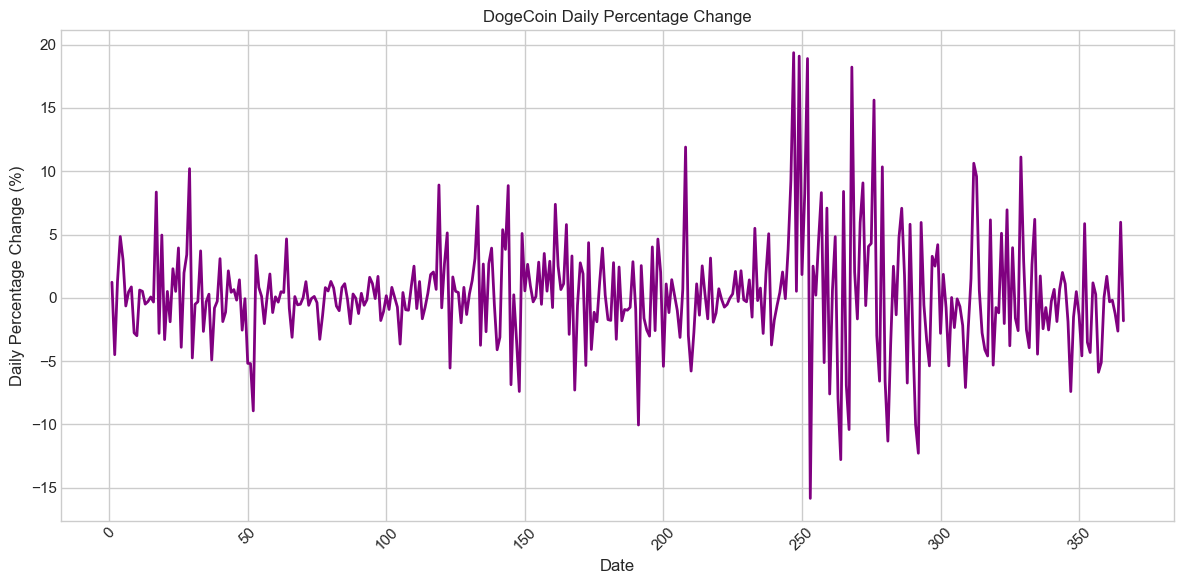

Shows the daily price fluctuations in percentage terms, providing a sense of the volatility of Dogecoin.


In [6]:
# Daily Percentage Change
df['Daily Change'] = df['Close'].pct_change() * 100
plt.figure(figsize=(12, 6))
plt.title("DogeCoin Daily Percentage Change")
plt.xlabel("Date")
plt.ylabel("Daily Percentage Change (%)")
plt.plot(df.index, df['Daily Change'], color='purple', linewidth=2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f'Shows the daily price fluctuations in percentage terms, providing a sense of the volatility of Dogecoin.')

### **Moving Averages**:
    Plotting moving averages can help identify trends and smooth out short-term fluctuations.

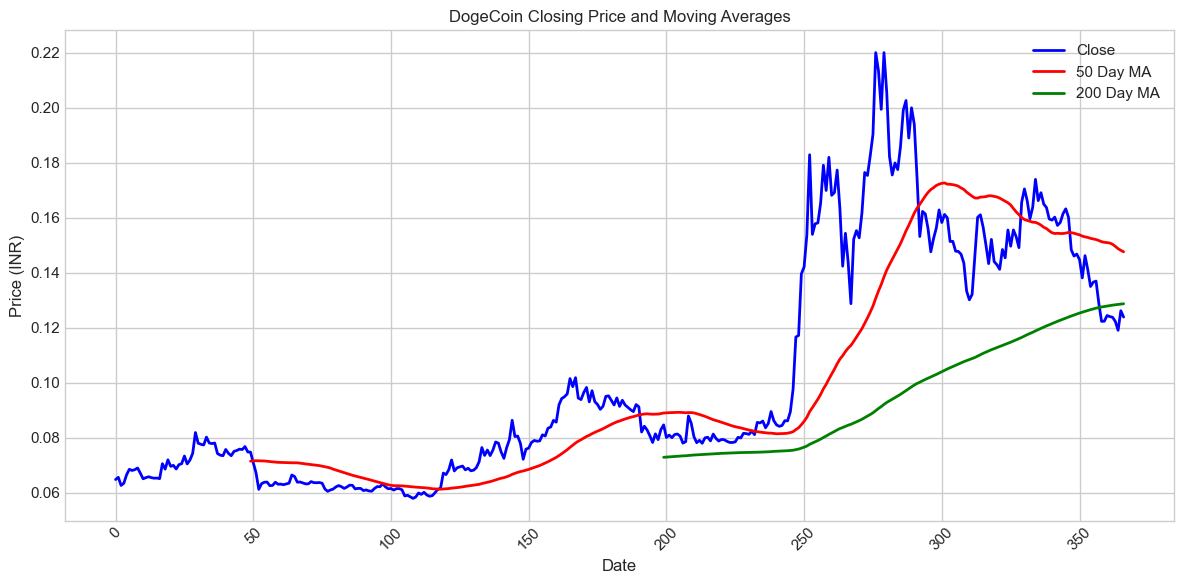

Plots the 50-day and 200-day moving averages, helping to smooth out short-term fluctuations and identify longer-term trends.


In [7]:
# Moving Averages
df['50 Day MA'] = df['Close'].rolling(window=50).mean()
df['200 Day MA'] = df['Close'].rolling(window=200).mean()
plt.figure(figsize=(12, 6))
plt.title("DogeCoin Closing Price and Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.plot(df.index, df["Close"], color='blue', linewidth=2, label='Close')
plt.plot(df.index, df['50 Day MA'], color='red', linewidth=2, label='50 Day MA')
plt.plot(df.index, df['200 Day MA'], color='green', linewidth=2, label='200 Day MA')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f'Plots the 50-day and 200-day moving averages, helping to smooth out short-term fluctuations and identify longer-term trends.')

## Predictions of the future price of Dogecoin

To predict the future price of Dogecoin, we can use various time series forecasting techniques.

In [8]:
# Prepare data for prediction
df['Date_ordinal'] = pd.to_datetime(df["Date"]).apply(lambda date: date.toordinal())
X = df[['Date_ordinal']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0003239237527870765


### **Visualize the Predictions** 

Plot the historical and forecasted prices.

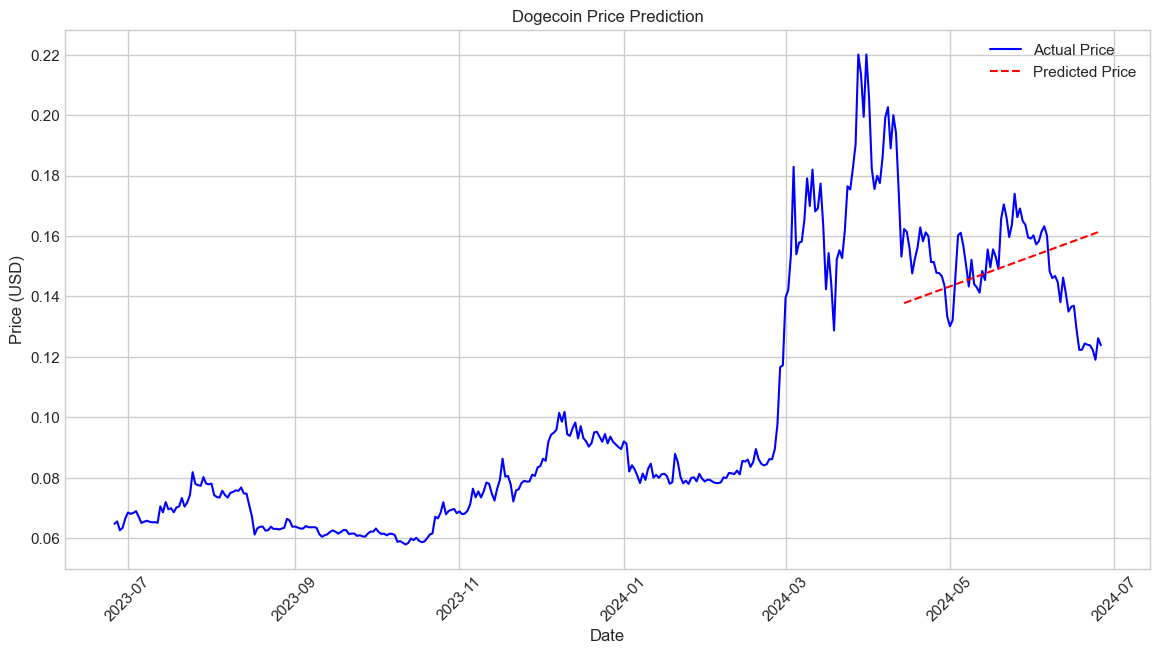

In [9]:
# Plot actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], color='blue', label='Actual Price')
plt.plot(df['Date'][len(X_train):], y_pred, color='red', linestyle='dashed', label='Predicted Price')
plt.title('Dogecoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Conclusion

In this project, I performed exploratory data analysis (EDA) on the Dogecoin dataset to uncover insights about its historical price trends and trading volumes. Several visualizations were created, including:

1. **Closing Price Over Time**: Showcasing the fluctuations and trends in Dogecoin's closing prices.
2. **Trading Volume Over Time**: Highlighting periods of high trading activity and interest in Dogecoin.
3. **High and Low Prices Over Time**: Comparing the daily high and low prices to understand price volatility.
4. **Moving Averages**: Utilizing 50-day and 200-day moving averages to identify trends and potential support/resistance levels.

Additionally, I built a linear regression model to predict Dogecoin's closing prices based on date information. The model's performance was evaluated using the Mean Squared Error (MSE) metric.